# Import

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import torch.optim as optim

%matplotlib inline

# Загрузка данных

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"{device}" " is available.")

cpu is available.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/GOOG.csv')

In [ ]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# Предобработка данных

Удаление столбцов

In [ ]:
df=df.drop(columns=['symbol','divCash','splitFactor','adjClose','adjHigh','adjLow','adjOpen','adjVolume'])

Преобразование типа даннх даты

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733


# Визуализация данных

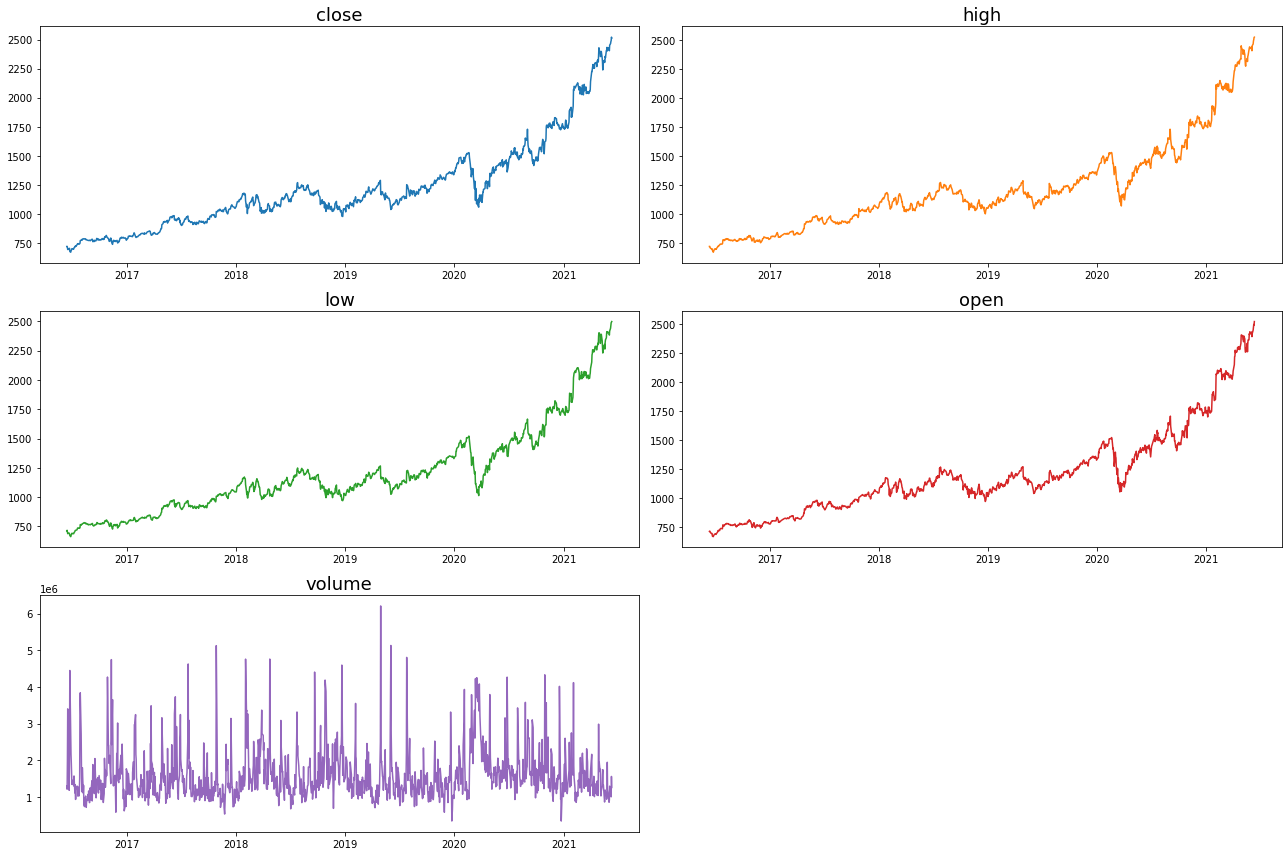

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,12))

c=1

for i in range(len(df.columns)-1):
    color = next(colors)["color"]

    plt.subplot(3, 2, c)

    plt.plot(df.date,df.iloc[:,i+1], color= color)

    plt.title(df.columns[i+1], fontsize=18)

    c+=1

plt.tight_layout()
plt.show()

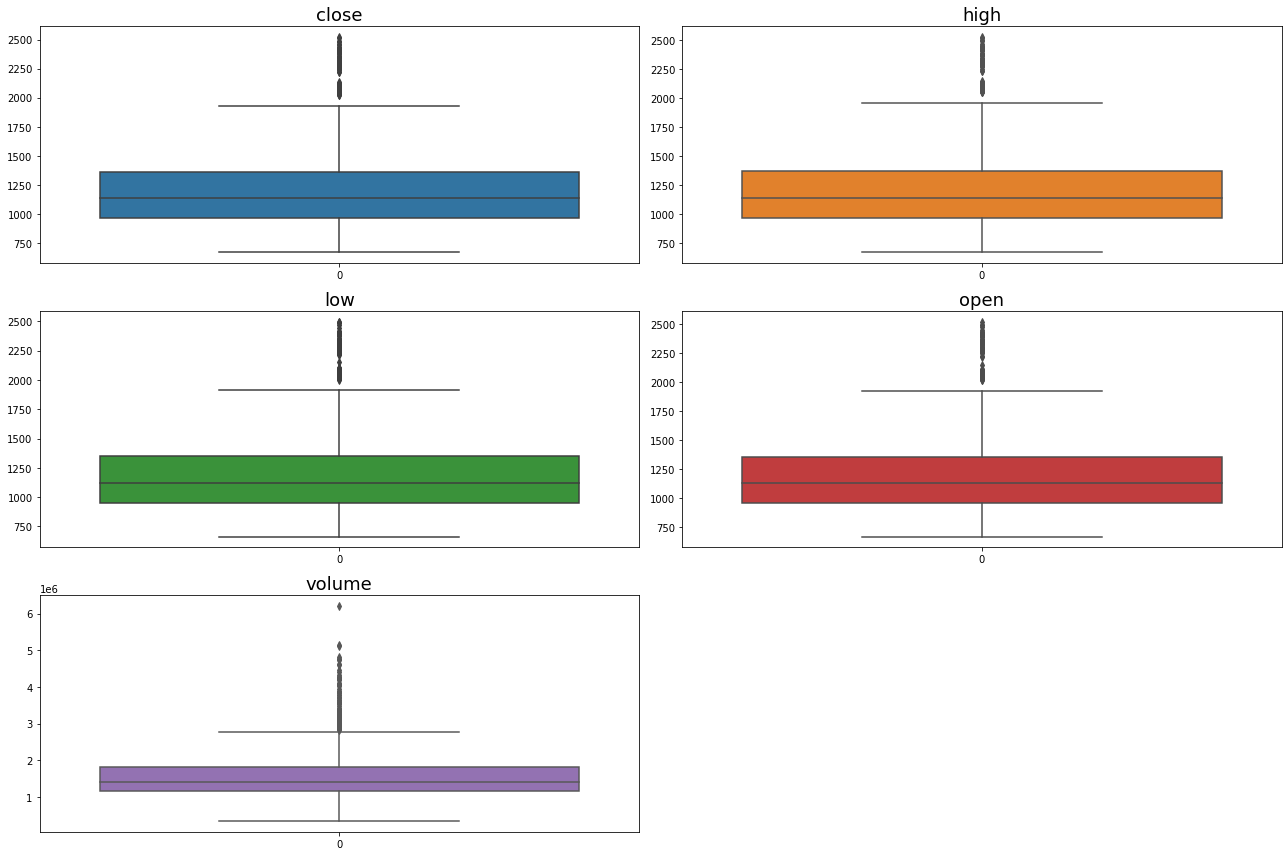

In [ ]:
colors = plt.rcParams["axes.prop_cycle"]()

fig = plt.figure(figsize=(18,12))

c=1

for i in range(len(df.columns)-1):
    color = next(colors)["color"]

    plt.subplot(3, 2, c)

    sns.boxplot(df.iloc[:,i+1],color = color)

    plt.title(df.columns[i+1], fontsize=18)

    c+=1

plt.tight_layout()
plt.show()

In [ ]:
# добавление целевого признака (1 - цена закрытия возрасла, 0 - цена закрытия упала)
df['target'] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["close"]
df

<ipython-input-11-4f09c8d8248a>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df['target'] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["close"]


,date,close,high,low,open,volume,target
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,NaN
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,0.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,0.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,1.0
...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,1.0


In [ ]:
df.target.value_counts()

1.0    695
0.0    562
Name: target, dtype: int64

<Axes: ylabel='count'>

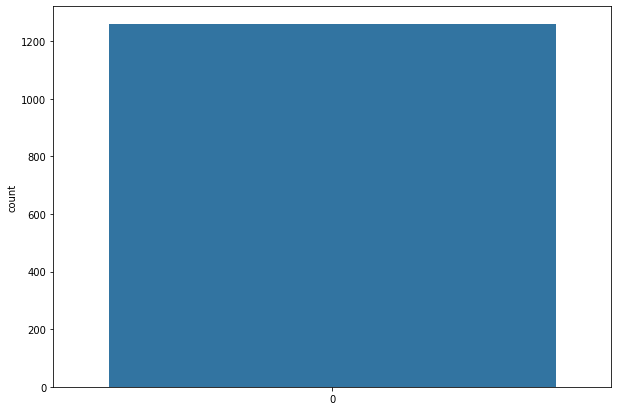

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.countplot(df.target)

# Добавление новых признаков

Создание новых признаков на основе имеющихся

In [ ]:
# средние значения 
weekly_mean = df.rolling(7).mean()
mounth_mean = df.rolling(30).mean()
quarterly_mean = df.rolling(90).mean()
annual_mean = df.rolling(365).mean()

# недельный тренд
weekly_trend = df.rolling(7).mean()["target"]

df["weekly_mean"] = weekly_mean["close"] / df["close"]
df["mounth_mean"] = mounth_mean["close"] / df["close"]
df["quarterly_mean"] = quarterly_mean["close"] / df["close"]
df["annual_mean"] = annual_mean["close"] / df["close"]

df["annual_weekly_mean"] = df["annual_mean"] / df["weekly_mean"]
df["annual_mounth_mean"] = df["annual_mean"] / df["mounth_mean"]
df["annual_quarterly_mean"] = df["annual_mean"] / df["quarterly_mean"]
df["weekly_trend"] = weekly_trend

# Отношение цены открытия к цене закрытия
df["open_close_ratio"] = df["open"] / df["close"]

# Отношение высшей ены к цене закрытия
df["high_close_ratio"] = df["high"] / df["close"]

# отношение низшей цены к цене закрытия
df["low_close_ratio"] = df["low"] / df["close"]

<ipython-input-14-554c809aaf60>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  weekly_mean = df.rolling(7).mean()
<ipython-input-14-554c809aaf60>:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  mounth_mean = df.rolling(30).mean()
<ipython-input-14-554c809aaf60>:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  quarterly_mean = df.rolling(90).mean()
<ipython-input-14-554c809aaf60>:5: FutureWarning: Dropping of nuisan

Количесвто пропущенных значений в признаках

In [ ]:
df.isnull().sum()

date                       0
close                      0
high                       0
low                        0
open                       0
volume                     0
target                     1
weekly_mean                6
mounth_mean               29
quarterly_mean            89
annual_mean              364
annual_weekly_mean       364
annual_mounth_mean       364
annual_quarterly_mean    364
weekly_trend               7
open_close_ratio           0
high_close_ratio           0
low_close_ratio            0
dtype: int64

Заполнение пропусков нулями

In [ ]:
df.fillna(0, inplace=True)

# Обучающая и тестовая выборки

Задание границы разбиения тестовой и тренировочной выборок

In [ ]:
threshold = int(len(df)*0.)

Разбиение тестовой и тренировойчной выборок

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_test, X_val, y_train, y_test, y_val

X_train, X_test, X_val, y_train, y_test, y_val = train_val_test_split(df, 'target', test_ratio=0.2)

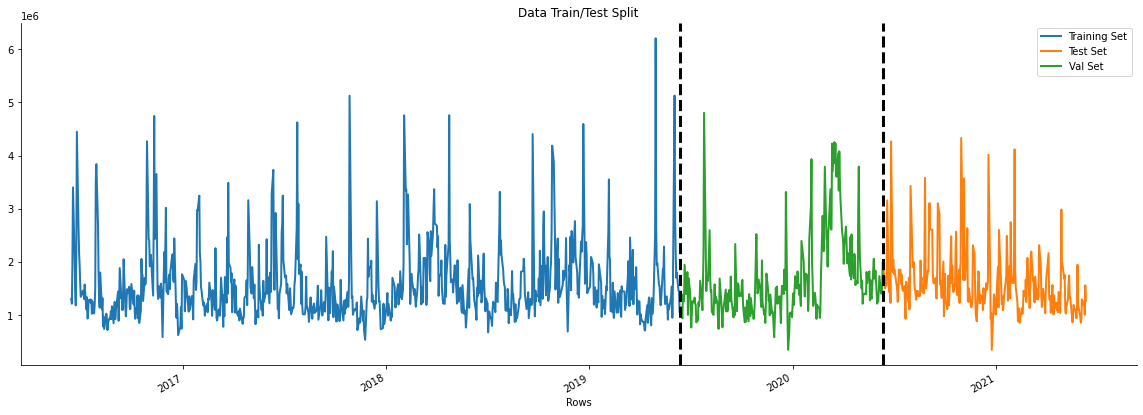

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))

X_train['volume'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=2)

X_test['volume'].plot(ax=ax, label='Test Set',  linewidth=2)

X_val['volume'].plot(ax=ax, label='Val Set',  linewidth=2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

ax.axvline(df.index[int(len(df)*0.8)], color='black', ls='--', lw=3)
ax.axvline(df.index[int(len(df)*0.8*0.75)], color='black', ls='--', lw=3)

ax.legend(['Training Set', 'Test Set','Val Set'])

ax.set_xlabel('Rows')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(TensorDataset(test_features, test_targets), batch_size=1, shuffle=False, drop_last=True)

# Архитектуры нейронок

## RNN1

In [ ]:
class RNN1(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNN1, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        self.fc1 = nn.Linear(hidden_dim, 256)
        self.fc2 = nn.Linear(128, 512)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(64, output_dim)
        self.maxpool = nn.MaxPool1d(2)
        self.dropout = nn.Dropout(dropout_prob)
        self.act1 = nn.ReLU()
        self.act2 = nn.Tanh()

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]

        out = self.fc1(out)
        out = self.act1(out)
        out = self.maxpool(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.act1(out)
        out = self.maxpool(out)
        out = self.dropout(out)
        
        out = self.fc3(out)
        out = self.act1(out)
        out = self.maxpool(out)
        out = self.dropout(out)

        out = self.fc4(out)
        out = self.act2(out)
        return out

## RNN2

In [ ]:
class RNN2(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNN2, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc1 = nn.Linear(hidden_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, output_dim) 
        self.act1 = nn.ReLU()
        self.act2 = nn.Tanh()

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]

        out = self.fc1(out)
        out = self.act1(out)

        out = self.fc2(out)
        out = self.act1(out)
        
        out = self.fc3(out)
        out = self.act1(out)

        out = self.fc4(out)
        out = self.act1(out)

        out = self.fc5(out)
        out = self.act2(out)
        return out

## RNN3

In [ ]:
class RNN3(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNN3, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc1 = nn.Linear(hidden_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 1024)
        self.fc6 = nn.Linear(1024, 512)
        self.fc7 = nn.Linear(512, output_dim)
        self.act1 = nn.ReLU()
        self.act2 = nn.Tanh()
        self.dropout = nn.Dropout1d(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]

        out = self.fc1(out)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act1(out)
        out = self.fc3(out)
        out = self.act1(out)
        out = self.fc4(out)
        out = self.act1(out)
        out = self.fc5(out)
        out = self.act1(out)
        out = self.fc6(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc7(out)
        out = self.act2(out)
        return out

## RNN4

In [ ]:
class RNN4(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNN4, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc1 = nn.Linear(hidden_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 1024)
        self.fc5 = nn.Linear(1024, 2048)
        self.fc6 = nn.Linear(2048, 1024)
        self.fc7 = nn.Linear(1024, 512)
        self.fc8 = nn.Linear(512, output_dim)
        self.act1 = nn.ReLU()
        self.act2 = nn.Tanh()
        self.dropout = nn.Dropout1d(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]

        out = self.fc1(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc4(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc5(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc6(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc7(out)
        out = self.act1(out)
        out = self.dropout(out)
        out = self.fc8(out)
        out = self.act2(out)

        return out

# Обучение моделей

In [ ]:
def get_model(model, model_params):
    models = {
        "rnn1": RNN1,
        "rnn2": RNN2,
        "rnn3": RNN3,
        "rnn4": RNN4,
        "rnn":RNNModel,
        "lstm": LSTMModel,
        "gru": GRUModel,
    }
    return models.get(model.lower())(**model_params)

In [ ]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )

        #torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())
                

        return predictions, values

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

# Обучение RNN1

[1/1000] Training loss: 0.3256	 Validation loss: 0.2592
[2/1000] Training loss: 0.2555	 Validation loss: 0.2542
[3/1000] Training loss: 0.2486	 Validation loss: 0.2405
[4/1000] Training loss: 0.2411	 Validation loss: 0.2296
[5/1000] Training loss: 0.2248	 Validation loss: 0.2013
[6/1000] Training loss: 0.1901	 Validation loss: 0.1518
[7/1000] Training loss: 0.1580	 Validation loss: 0.1250
[8/1000] Training loss: 0.1941	 Validation loss: 0.1568
[9/1000] Training loss: 0.2666	 Validation loss: 0.2075
[10/1000] Training loss: 0.1778	 Validation loss: 0.1491
[50/1000] Training loss: 0.1294	 Validation loss: 0.1148
[100/1000] Training loss: 0.1267	 Validation loss: 0.1123
[150/1000] Training loss: 0.1160	 Validation loss: 0.1141
[200/1000] Training loss: 0.1054	 Validation loss: 0.1168
[250/1000] Training loss: 0.1089	 Validation loss: 0.1392
[300/1000] Training loss: 0.0922	 Validation loss: 0.1329
[350/1000] Training loss: 0.0873	 Validation loss: 0.1355
[400/1000] Training loss: 0.1001	 

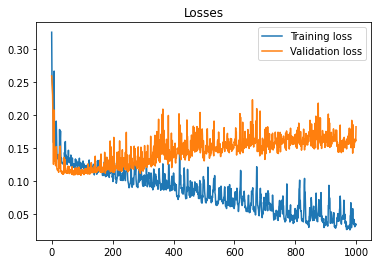

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 1000

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn1', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn1 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn1.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn1.plot_losses()



In [ ]:
pred, val = opt_rnn1.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 58.0 %


[1/150] Training loss: 0.3615	 Validation loss: 0.2715
[2/150] Training loss: 0.2521	 Validation loss: 0.2557
[3/150] Training loss: 0.2510	 Validation loss: 0.2412
[4/150] Training loss: 0.2445	 Validation loss: 0.2343
[5/150] Training loss: 0.2318	 Validation loss: 0.2159
[6/150] Training loss: 0.2122	 Validation loss: 0.1712
[7/150] Training loss: 0.1718	 Validation loss: 0.1309
[8/150] Training loss: 0.1527	 Validation loss: 0.1445
[9/150] Training loss: 0.1746	 Validation loss: 0.1409
[10/150] Training loss: 0.2525	 Validation loss: 0.1517
[50/150] Training loss: 0.1268	 Validation loss: 0.1159
[100/150] Training loss: 0.1205	 Validation loss: 0.1170
[150/150] Training loss: 0.1099	 Validation loss: 0.1199


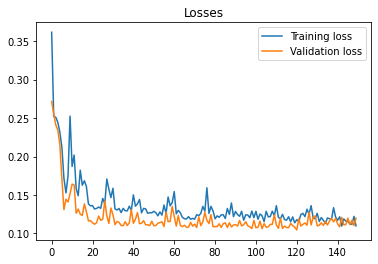

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 150

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn1', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn1 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn1.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn1.plot_losses()



In [ ]:
pred, val = opt_rnn1.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 73.0 %


# Обучение RNN2

[1/500] Training loss: 0.3216	 Validation loss: 0.2509
[2/500] Training loss: 0.2572	 Validation loss: 0.2477
[3/500] Training loss: 0.2467	 Validation loss: 0.2484
[4/500] Training loss: 0.2444	 Validation loss: 0.2368
[5/500] Training loss: 0.2375	 Validation loss: 0.2072
[6/500] Training loss: 0.2383	 Validation loss: 0.2346
[7/500] Training loss: 0.2398	 Validation loss: 0.2005
[8/500] Training loss: 0.2113	 Validation loss: 0.2101
[9/500] Training loss: 0.2377	 Validation loss: 0.1654
[10/500] Training loss: 0.2482	 Validation loss: 0.2254
[50/500] Training loss: 0.1277	 Validation loss: 0.1147
[100/500] Training loss: 0.1188	 Validation loss: 0.1110
[150/500] Training loss: 0.1190	 Validation loss: 0.1136
[200/500] Training loss: 0.1108	 Validation loss: 0.1408
[250/500] Training loss: 0.0942	 Validation loss: 0.1185
[300/500] Training loss: 0.1089	 Validation loss: 0.1249
[350/500] Training loss: 0.0923	 Validation loss: 0.1392
[400/500] Training loss: 0.0898	 Validation loss: 0

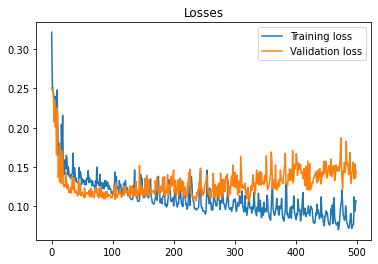

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 500

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn2', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn2 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn2.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn2.plot_losses()



In [ ]:
pred, val = opt_rnn2.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 48.0 %


[1/100] Training loss: 0.3160	 Validation loss: 0.2482
[2/100] Training loss: 0.2551	 Validation loss: 0.2455
[3/100] Training loss: 0.2445	 Validation loss: 0.2419
[4/100] Training loss: 0.2304	 Validation loss: 0.1997
[5/100] Training loss: 0.1976	 Validation loss: 0.1571
[6/100] Training loss: 0.2280	 Validation loss: 0.3017
[7/100] Training loss: 0.2873	 Validation loss: 0.2246
[8/100] Training loss: 0.1956	 Validation loss: 0.1677
[9/100] Training loss: 0.1993	 Validation loss: 0.1880
[10/100] Training loss: 0.2042	 Validation loss: 0.1531
[50/100] Training loss: 0.1400	 Validation loss: 0.1128
[100/100] Training loss: 0.1330	 Validation loss: 0.1189


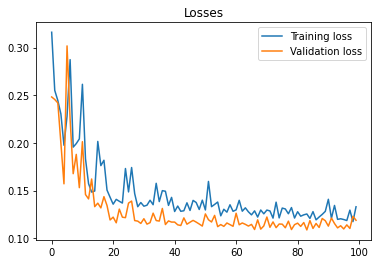

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 100

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn2', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn2 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn2.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn2.plot_losses()



In [ ]:
pred, val = opt_rnn2.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 87.0 %


# Обучение RNN3

[1/500] Training loss: 0.3395	 Validation loss: 0.3127
[2/500] Training loss: 0.3074	 Validation loss: 0.2474
[3/500] Training loss: 0.2844	 Validation loss: 0.2557
[4/500] Training loss: 0.2829	 Validation loss: 0.2466
[5/500] Training loss: 0.2755	 Validation loss: 0.2065
[6/500] Training loss: 0.2730	 Validation loss: 0.2076
[7/500] Training loss: 0.3045	 Validation loss: 0.2628
[8/500] Training loss: 0.2673	 Validation loss: 0.1932
[9/500] Training loss: 0.2298	 Validation loss: 0.1246
[10/500] Training loss: 0.2242	 Validation loss: 0.1264
[50/500] Training loss: 0.1572	 Validation loss: 0.1173
[100/500] Training loss: 0.1619	 Validation loss: 0.1328
[150/500] Training loss: 0.1486	 Validation loss: 0.1166
[200/500] Training loss: 0.1538	 Validation loss: 0.1390
[250/500] Training loss: 0.1302	 Validation loss: 0.1205
[300/500] Training loss: 0.1249	 Validation loss: 0.1130
[350/500] Training loss: 0.1360	 Validation loss: 0.1257
[400/500] Training loss: 0.1253	 Validation loss: 0

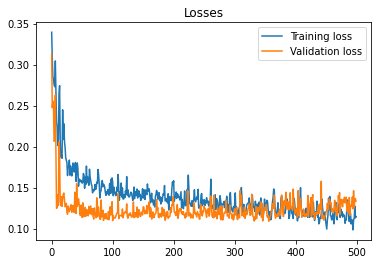

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 500

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn3', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn3 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn3.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn3.plot_losses()



In [ ]:
pred, val = opt_rnn3.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 69.0 %


[1/200] Training loss: 0.3553	 Validation loss: 0.3042
[2/200] Training loss: 0.3138	 Validation loss: 0.2484
[3/200] Training loss: 0.3041	 Validation loss: 0.2625
[4/200] Training loss: 0.2857	 Validation loss: 0.2703
[5/200] Training loss: 0.2853	 Validation loss: 0.2085
[6/200] Training loss: 0.2797	 Validation loss: 0.1736
[7/200] Training loss: 0.3265	 Validation loss: 0.3094
[8/200] Training loss: 0.2562	 Validation loss: 0.1790
[9/200] Training loss: 0.2986	 Validation loss: 0.1871
[10/200] Training loss: 0.2293	 Validation loss: 0.2165
[50/200] Training loss: 0.1704	 Validation loss: 0.1229
[100/200] Training loss: 0.1333	 Validation loss: 0.1152
[150/200] Training loss: 0.1319	 Validation loss: 0.1211
[200/200] Training loss: 0.1291	 Validation loss: 0.1200


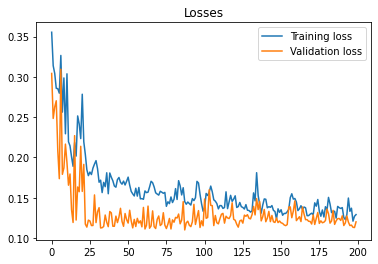

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 200

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn3', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn3 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn3.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn3.plot_losses()



In [ ]:
pred, val = opt_rnn3.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 94.0 %


# Обучение RNN4

[1/500] Training loss: 0.4031	 Validation loss: 0.3648
[2/500] Training loss: 0.3355	 Validation loss: 0.2629
[3/500] Training loss: 0.2967	 Validation loss: 0.2550
[4/500] Training loss: 0.2951	 Validation loss: 0.2882
[5/500] Training loss: 0.2960	 Validation loss: 0.2549
[6/500] Training loss: 0.2909	 Validation loss: 0.2635
[7/500] Training loss: 0.2918	 Validation loss: 0.2579
[8/500] Training loss: 0.2854	 Validation loss: 0.2209
[9/500] Training loss: 0.2853	 Validation loss: 0.2708
[10/500] Training loss: 0.2758	 Validation loss: 0.2568
[50/500] Training loss: 0.2244	 Validation loss: 0.1358
[100/500] Training loss: 0.2119	 Validation loss: 0.1445
[150/500] Training loss: 0.2083	 Validation loss: 0.1502
[200/500] Training loss: 0.2135	 Validation loss: 0.1485
[250/500] Training loss: 0.2114	 Validation loss: 0.1600
[300/500] Training loss: 0.1933	 Validation loss: 0.1462
[350/500] Training loss: 0.2051	 Validation loss: 0.1393
[400/500] Training loss: 0.2086	 Validation loss: 0

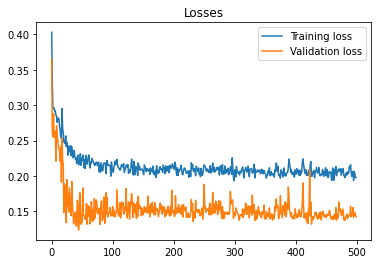

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 500

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn4', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn4 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn4.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn4.plot_losses()



In [ ]:
pred, val = opt_rnn4.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 70.0 %


[1/100] Training loss: 0.3738	 Validation loss: 0.2951
[2/100] Training loss: 0.3062	 Validation loss: 0.2972
[3/100] Training loss: 0.3074	 Validation loss: 0.2601
[4/100] Training loss: 0.2720	 Validation loss: 0.2703
[5/100] Training loss: 0.2911	 Validation loss: 0.2530
[6/100] Training loss: 0.2805	 Validation loss: 0.2586
[7/100] Training loss: 0.2828	 Validation loss: 0.2316
[8/100] Training loss: 0.2730	 Validation loss: 0.2055
[9/100] Training loss: 0.2942	 Validation loss: 0.2576
[10/100] Training loss: 0.2777	 Validation loss: 0.2245
[50/100] Training loss: 0.2181	 Validation loss: 0.1580
[100/100] Training loss: 0.2059	 Validation loss: 0.1462


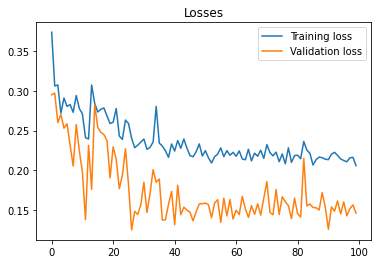

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 100

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn4', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn4 = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn4.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn4.plot_losses()



In [ ]:
pred, val = opt_rnn4.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 88.0 %


# Классическая модель RNN

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()


    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, h0 = self.rnn(x, h0.detach())
        out = out[:, -1, :]

        out = self.fc(out)
        out = self.act(out)

        return out

[1/1000] Training loss: 0.3032	 Validation loss: 0.2684
[2/1000] Training loss: 0.2519	 Validation loss: 0.2446
[3/1000] Training loss: 0.2475	 Validation loss: 0.2413
[4/1000] Training loss: 0.2426	 Validation loss: 0.2344
[5/1000] Training loss: 0.2336	 Validation loss: 0.2274
[6/1000] Training loss: 0.2262	 Validation loss: 0.2176
[7/1000] Training loss: 0.2170	 Validation loss: 0.2059
[8/1000] Training loss: 0.2043	 Validation loss: 0.1918
[9/1000] Training loss: 0.1947	 Validation loss: 0.1790
[10/1000] Training loss: 0.1839	 Validation loss: 0.1690
[50/1000] Training loss: 0.1518	 Validation loss: 0.1412
[100/1000] Training loss: 0.1448	 Validation loss: 0.1330
[150/1000] Training loss: 0.1237	 Validation loss: 0.1137
[200/1000] Training loss: 0.1215	 Validation loss: 0.1155
[250/1000] Training loss: 0.1149	 Validation loss: 0.1092
[300/1000] Training loss: 0.1106	 Validation loss: 0.1071
[350/1000] Training loss: 0.1110	 Validation loss: 0.1099
[400/1000] Training loss: 0.1102	 

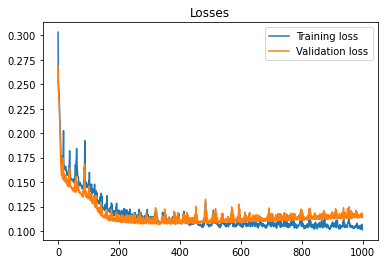

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 1000

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn_simp.plot_losses()



In [ ]:
pred, val = opt_rnn_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 77.0 %


[1/300] Training loss: 0.3318	 Validation loss: 0.2550
[2/300] Training loss: 0.2619	 Validation loss: 0.2564
[3/300] Training loss: 0.2450	 Validation loss: 0.2455
[4/300] Training loss: 0.2460	 Validation loss: 0.2402
[5/300] Training loss: 0.2396	 Validation loss: 0.2343
[6/300] Training loss: 0.2333	 Validation loss: 0.2288
[7/300] Training loss: 0.2283	 Validation loss: 0.2188
[8/300] Training loss: 0.2173	 Validation loss: 0.2073
[9/300] Training loss: 0.2061	 Validation loss: 0.1922
[10/300] Training loss: 0.1921	 Validation loss: 0.1772
[50/300] Training loss: 0.1514	 Validation loss: 0.1523
[100/300] Training loss: 0.1369	 Validation loss: 0.1303
[150/300] Training loss: 0.1207	 Validation loss: 0.1195
[200/300] Training loss: 0.1178	 Validation loss: 0.1105
[250/300] Training loss: 0.1105	 Validation loss: 0.1086
[300/300] Training loss: 0.1103	 Validation loss: 0.1126


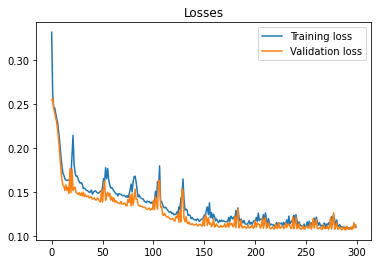

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 300

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('rnn', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_rnn_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_rnn_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_rnn_simp.plot_losses()



In [ ]:
pred, val = opt_rnn_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 90.0 %


# Классическая модель LSTM

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc = nn.Linear(hidden_dim, output_dim)
        self.act = nn.Tanh()

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)
        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = out[:, -1, :]

        out = self.fc(out)
        out = self.act(out)

        return out

[1/1000] Training loss: 0.4579	 Validation loss: 0.4046
[2/1000] Training loss: 0.3687	 Validation loss: 0.2979
[3/1000] Training loss: 0.2917	 Validation loss: 0.2517
[4/1000] Training loss: 0.2674	 Validation loss: 0.2667
[5/1000] Training loss: 0.2588	 Validation loss: 0.2549
[6/1000] Training loss: 0.2518	 Validation loss: 0.2483
[7/1000] Training loss: 0.2530	 Validation loss: 0.2467
[8/1000] Training loss: 0.2514	 Validation loss: 0.2457
[9/1000] Training loss: 0.2473	 Validation loss: 0.2438
[10/1000] Training loss: 0.2458	 Validation loss: 0.2412
[50/1000] Training loss: 0.1308	 Validation loss: 0.1157
[100/1000] Training loss: 0.1198	 Validation loss: 0.1085
[150/1000] Training loss: 0.1141	 Validation loss: 0.1082
[200/1000] Training loss: 0.1083	 Validation loss: 0.1087
[250/1000] Training loss: 0.1151	 Validation loss: 0.1078
[300/1000] Training loss: 0.1092	 Validation loss: 0.1088
[350/1000] Training loss: 0.1144	 Validation loss: 0.1087
[400/1000] Training loss: 0.1081	 

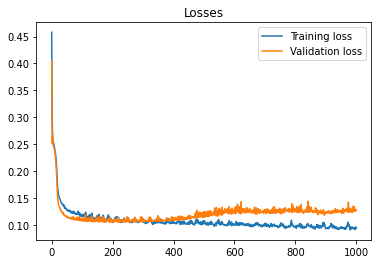

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 1000

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_lstm_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_lstm_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_lstm_simp.plot_losses()



In [ ]:
pred, val = opt_lstm_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 63.0 %


[1/200] Training loss: 0.3875	 Validation loss: 0.3403
[2/200] Training loss: 0.3157	 Validation loss: 0.2641
[3/200] Training loss: 0.2707	 Validation loss: 0.2544
[4/200] Training loss: 0.2603	 Validation loss: 0.2580
[5/200] Training loss: 0.2522	 Validation loss: 0.2485
[6/200] Training loss: 0.2512	 Validation loss: 0.2456
[7/200] Training loss: 0.2503	 Validation loss: 0.2441
[8/200] Training loss: 0.2471	 Validation loss: 0.2423
[9/200] Training loss: 0.2432	 Validation loss: 0.2392
[10/200] Training loss: 0.2419	 Validation loss: 0.2355
[50/200] Training loss: 0.1285	 Validation loss: 0.1130
[100/200] Training loss: 0.1210	 Validation loss: 0.1090
[150/200] Training loss: 0.1109	 Validation loss: 0.1063
[200/200] Training loss: 0.1106	 Validation loss: 0.1074


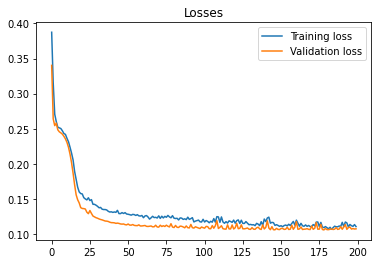

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 200

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_lstm_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_lstm_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_lstm_simp.plot_losses()



In [ ]:
pred, val = opt_lstm_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 79.0 %


# Классическая модель GRU

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRUModel, self).__init__()

        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        self.fc = nn.Linear(hidden_dim, output_dim)
        self.act1 = nn.Tanh()

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().to(device)

        out, _ = self.gru(x, h0.detach())

        out = out[:, -1, :]

        out = self.fc(out)
        out = self.act1(out)

        return out


[1/1000] Training loss: 0.3689	 Validation loss: 0.2861
[2/1000] Training loss: 0.2807	 Validation loss: 0.2535
[3/1000] Training loss: 0.2619	 Validation loss: 0.2589
[4/1000] Training loss: 0.2519	 Validation loss: 0.2467
[5/1000] Training loss: 0.2489	 Validation loss: 0.2436
[6/1000] Training loss: 0.2452	 Validation loss: 0.2402
[7/1000] Training loss: 0.2401	 Validation loss: 0.2355
[8/1000] Training loss: 0.2356	 Validation loss: 0.2297
[9/1000] Training loss: 0.2292	 Validation loss: 0.2207
[10/1000] Training loss: 0.2204	 Validation loss: 0.2088
[50/1000] Training loss: 0.1350	 Validation loss: 0.1173
[100/1000] Training loss: 0.1180	 Validation loss: 0.1103
[150/1000] Training loss: 0.1123	 Validation loss: 0.1067
[200/1000] Training loss: 0.1073	 Validation loss: 0.1067
[250/1000] Training loss: 0.1079	 Validation loss: 0.1118
[300/1000] Training loss: 0.1107	 Validation loss: 0.1106
[350/1000] Training loss: 0.1109	 Validation loss: 0.1074
[400/1000] Training loss: 0.1087	 

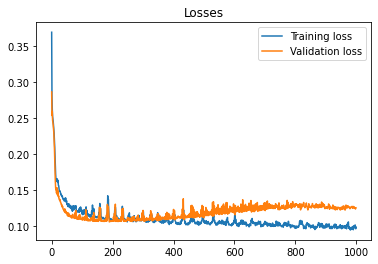

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 1000

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('gru', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_gru_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_gru_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_gru_simp.plot_losses()



In [ ]:
pred, val = opt_gru_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 67.0 %


[1/200] Training loss: 0.3814	 Validation loss: 0.2949
[2/200] Training loss: 0.2787	 Validation loss: 0.2508
[3/200] Training loss: 0.2591	 Validation loss: 0.2600
[4/200] Training loss: 0.2502	 Validation loss: 0.2465
[5/200] Training loss: 0.2469	 Validation loss: 0.2424
[6/200] Training loss: 0.2450	 Validation loss: 0.2390
[7/200] Training loss: 0.2406	 Validation loss: 0.2341
[8/200] Training loss: 0.2360	 Validation loss: 0.2277
[9/200] Training loss: 0.2268	 Validation loss: 0.2183
[10/200] Training loss: 0.2172	 Validation loss: 0.2054
[50/200] Training loss: 0.1314	 Validation loss: 0.1178
[100/200] Training loss: 0.1186	 Validation loss: 0.1084
[150/200] Training loss: 0.1156	 Validation loss: 0.1072
[200/200] Training loss: 0.1126	 Validation loss: 0.1071


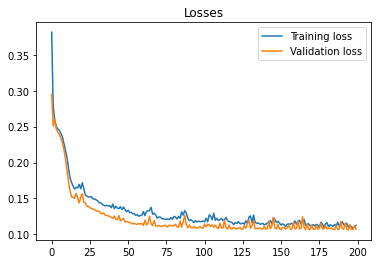

In [ ]:
input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 2
dropout = 0.15

n_epochs = 200

learning_rate = 1e-3

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('gru', model_params).to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-6)


opt_gru_simp = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt_gru_simp.train(train_loader, val_loader, batch_size=64, n_epochs=n_epochs, n_features=input_dim)
opt_gru_simp.plot_losses()



In [ ]:
pred, val = opt_gru_simp.evaluate(test_loader,64,n_features=16)

correct = 0
total = 0
for j in range(0,len(pred)):
  for i in pred[j]:
    correct+=i[0]
  for i in val[0]:
    total+=i[0]

print(f'Accuracy of the network: {100 * correct // total} %')

Accuracy of the network: 75.0 %
